# EE 5020 Homework 1: Pandas and Writing Practice

Name: 

CIN: 

## Overview

In this homework, you will practice writing some Python code and using the Python data analysis libraries (seaborn, pandas, numpy, matplotlib).  You will analyze one of the example datasets we have in the `as_datasets` folder, `hof.csv`.  This dataset  is based on the number of hits of a baseball player in their career and whether or not they are in the Hall of Fame.  The dataset contains two columns, "Hits" and "HOF".

## Section 1: Python Practice

First, import the following libraries with usable names:
- pandas
- matplotlib.pyplot
- seaborn
- numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Next, use pandas' `read_csv` function to import the CSV as a DataFrame, with a friendly, descriptive name:

In [4]:
df_hof = pd.read_csv('../as_datasets/hof.csv')

Now, let's get some preliminary information and descriptive statistics (count, mean, standard deviation, min, max, quartiles) about our dataset:

In [5]:
df_hof.describe()

,Hits,HOF
count,774.000000,774.000000
mean,1719.957364,0.182171
std,532.603682,0.386235
min,972.000000,0.000000
25%,1316.000000,0.000000
50%,1566.000000,0.000000
75%,2011.000000,0.000000
max,4256.000000,1.000000


As an exercise, let's use the last two digits of your CIN to sample the data in a systematic way.  Write a function that uses the [`np.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function that creates a "selection vector" (a `ndarray` with the row indices that we would like to select) to subsample an input DataFrame. 

The selection vector should contains multiples based on one quarter (floor divide by 4, the operator is two division symbols together like `//`) of the last two digits of a CIN and returns a subsampled version of the input DataFrame. You can get the last two digits of your CIN by using the modulo operator, which is the `%` operator.

For example, if the last two digits a CIN are 34, and our input DataFrame had 200 rows (obtained from the `len()` function), then the selection vector would be `[0, 8, 16, ...]`.  Then, this selection vector would be used to subsample the input DataFrame, so only rows 0, 8, 16, etc. are used.  You can select specific rows by just using the square brackets, like: `df_full_table.iloc[selection_vector]`, then just save the result into a new varable.

The signature for your function should be similar to:
```
def cin_subsample_dataframe(df_input: pd.DataFrame, cin: int) -> pd.DataFrame:
```

In [18]:
def cin_subsample_dataframe(df_input: pd.DataFrame, cin: int) -> pd.DataFrame:
    """
    Returns subsampled dataframe based on last two digits of cin divided by 4.
    """
    selection_vector = np.arange(0, len(df_input), (cin % 100) // 4)
    return df_input.iloc[selection_vector].copy()

Now, use your function to get a new DataFrame that is the subsampled version of the original DataFrame above, and save it to a new variable name:

In [19]:
df_subsampled = cin_subsample_dataframe(df_hof, 606066042)
df_subsampled.head()

,Hits,HOF
0,972,0
10,1060,0
20,1092,0
30,1109,0
40,1127,0


Let's look at the descriptive statistics for the subsampled DataFrame now.  What can we run in the cell below to get some descriptive statistics for our subsampled DataFrame?

In [12]:
df_subsampled.describe()

,Hits,HOF
count,78.000000,78.000000
mean,1718.192308,0.192308
std,539.549356,0.396664
min,972.000000,0.000000
25%,1315.000000,0.000000
50%,1566.500000,0.000000
75%,2006.250000,0.000000
max,3630.000000,1.000000


Now, edit (double-click) this cell to answer the following questions:


1. How many rows of data does your systematically subsampled DataFrame contain? 
2. What is the mean number of hits of the players in your subsampled DataFrame? 
3. What is the standard deviation of the hits of the players in your subsampled DataFrame? 

Next, let's plot the histograms for each column in your subsampled DataFrame.  Use the DataFrame's built-in `.hist()` function first, but also pass in the `figsize` parameter with a tuple of two values (width, height) to create a larger plot.  Try starting with `figsize=(5, 5)` and adjust the numbers individually until you like the plot.

array([[<AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'HOF'}>]], dtype=object)

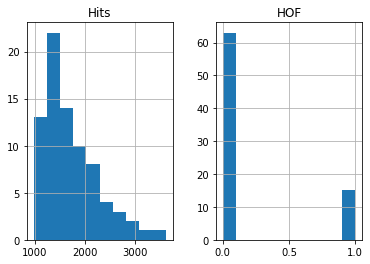

In [13]:
df_subsampled.hist()

Next, use seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function instead, which accepts a pandas DataFrame as the data.  Show the number of hits and the counts of whether the player is in the hall of fame separately.  Which parameter can you pass into `histplot()` to make it so the gap between 0 and 1 in the "HOF" data does not appear?

<AxesSubplot:xlabel='HOF', ylabel='Count'>

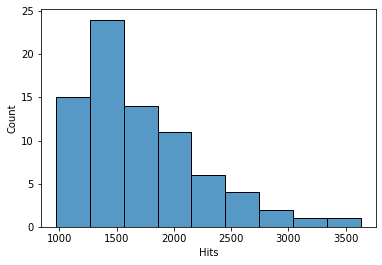

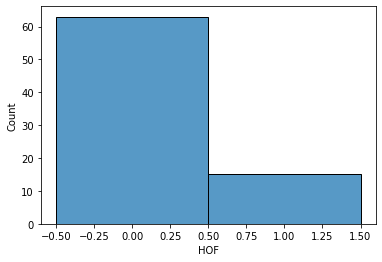

In [15]:
plt.figure()
sns.histplot(df_subsampled['Hits'])

plt.figure()
sns.histplot(df_subsampled['HOF'], discrete=True)

## Section 2: Dataset Analysis

Now, let's start analyzing our dataset and see if we can draw some conclusions!  For the rest of this section, you will add your own cells (either Markdown or Code) to show your analysis code and discuss your results.

**Write and discuss the steps to answering the following research question:** For the subsampled dataset, is having more hits than the mean number of hits more likely to achieve "hall of fame" status than random chance?

You will be graded on the following criteria:
- 25% statistical analysis is backed with reasoning and tests/scores
- 50% Python code is correct, logical, readable, and not excessive
- 25% clear writing and flow of the this section of the Jupyter notebook

Make sure you write down the reasoning and method of creation for any additional columns you need to create.

In [31]:
random_chance = 0.5

mean_hits = df_subsampled['Hits'].mean()
df_subsampled['Top_hitter'] = (df_subsampled['Hits'] > mean_hits).astype('int')
df_subsampled['Top_hitter_and_hof'] = df_subsampled['Top_hitter'] & df_subsampled['HOF']
df_subsampled.describe()

df_top = df_subsampled[df_subsampled['Top_hitter'] == 1]
print(df_top.describe())

df_top_hof = df_subsampled[df_subsampled['Top_hitter_and_hof'] == 1]
print(df_top_hof.describe())

              Hits        HOF  Top_hitter  Top_hitter_and_hof
count    31.000000  31.000000        31.0           31.000000
mean   2250.870968   0.419355         1.0            0.419355
std     457.012235   0.501610         0.0            0.501610
min    1726.000000   0.000000         1.0            0.000000
25%    1921.500000   0.000000         1.0            0.000000
50%    2127.000000   0.000000         1.0            0.000000
75%    2455.500000   1.000000         1.0            1.000000
max    3630.000000   1.000000         1.0            1.000000
              Hits   HOF  Top_hitter  Top_hitter_and_hof
count    13.000000  13.0        13.0                13.0
mean   2593.461538   1.0         1.0                 1.0
std     490.736965   0.0         0.0                 0.0
min    1912.000000   1.0         1.0                 1.0
25%    2304.000000   1.0         1.0                 1.0
50%    2596.000000   1.0         1.0                 1.0
75%    2873.000000   1.0         1.0       